# UTS PENAMBANGAN DATA

In [1]:
%pip install pymysql
%pip install psycopg2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


 id  n_days status            drug   age sex ascites hepatomegaly spiders edema  bilirubin cholesterol  albumin  copper  alk_phos   sgot tryglicerides platelets  prothrombin  stage
  1     400      D D-penicillamine 21464   F       Y            Y       Y     Y       14.5         261     2.60     156      1718 137.95           172       190         12.2      4
  2    4500      C D-penicillamine 20617   F       N            Y       Y     N        1.1         302     4.14      54      7394 113.52            88       221         10.6      3
  3    1012      D D-penicillamine 25594   M       N            N       N     S        1.4         176     3.48     210       516  96.10            55       151         12.0      4
  4    1925      D D-penicillamine 19994   F       N            Y       Y     S        1.8         244     2.54      64      6121  60.63            92       183         10.3      4
  5    1504     CL         Placebo 13918   F       N            Y       Y     N        3.4     

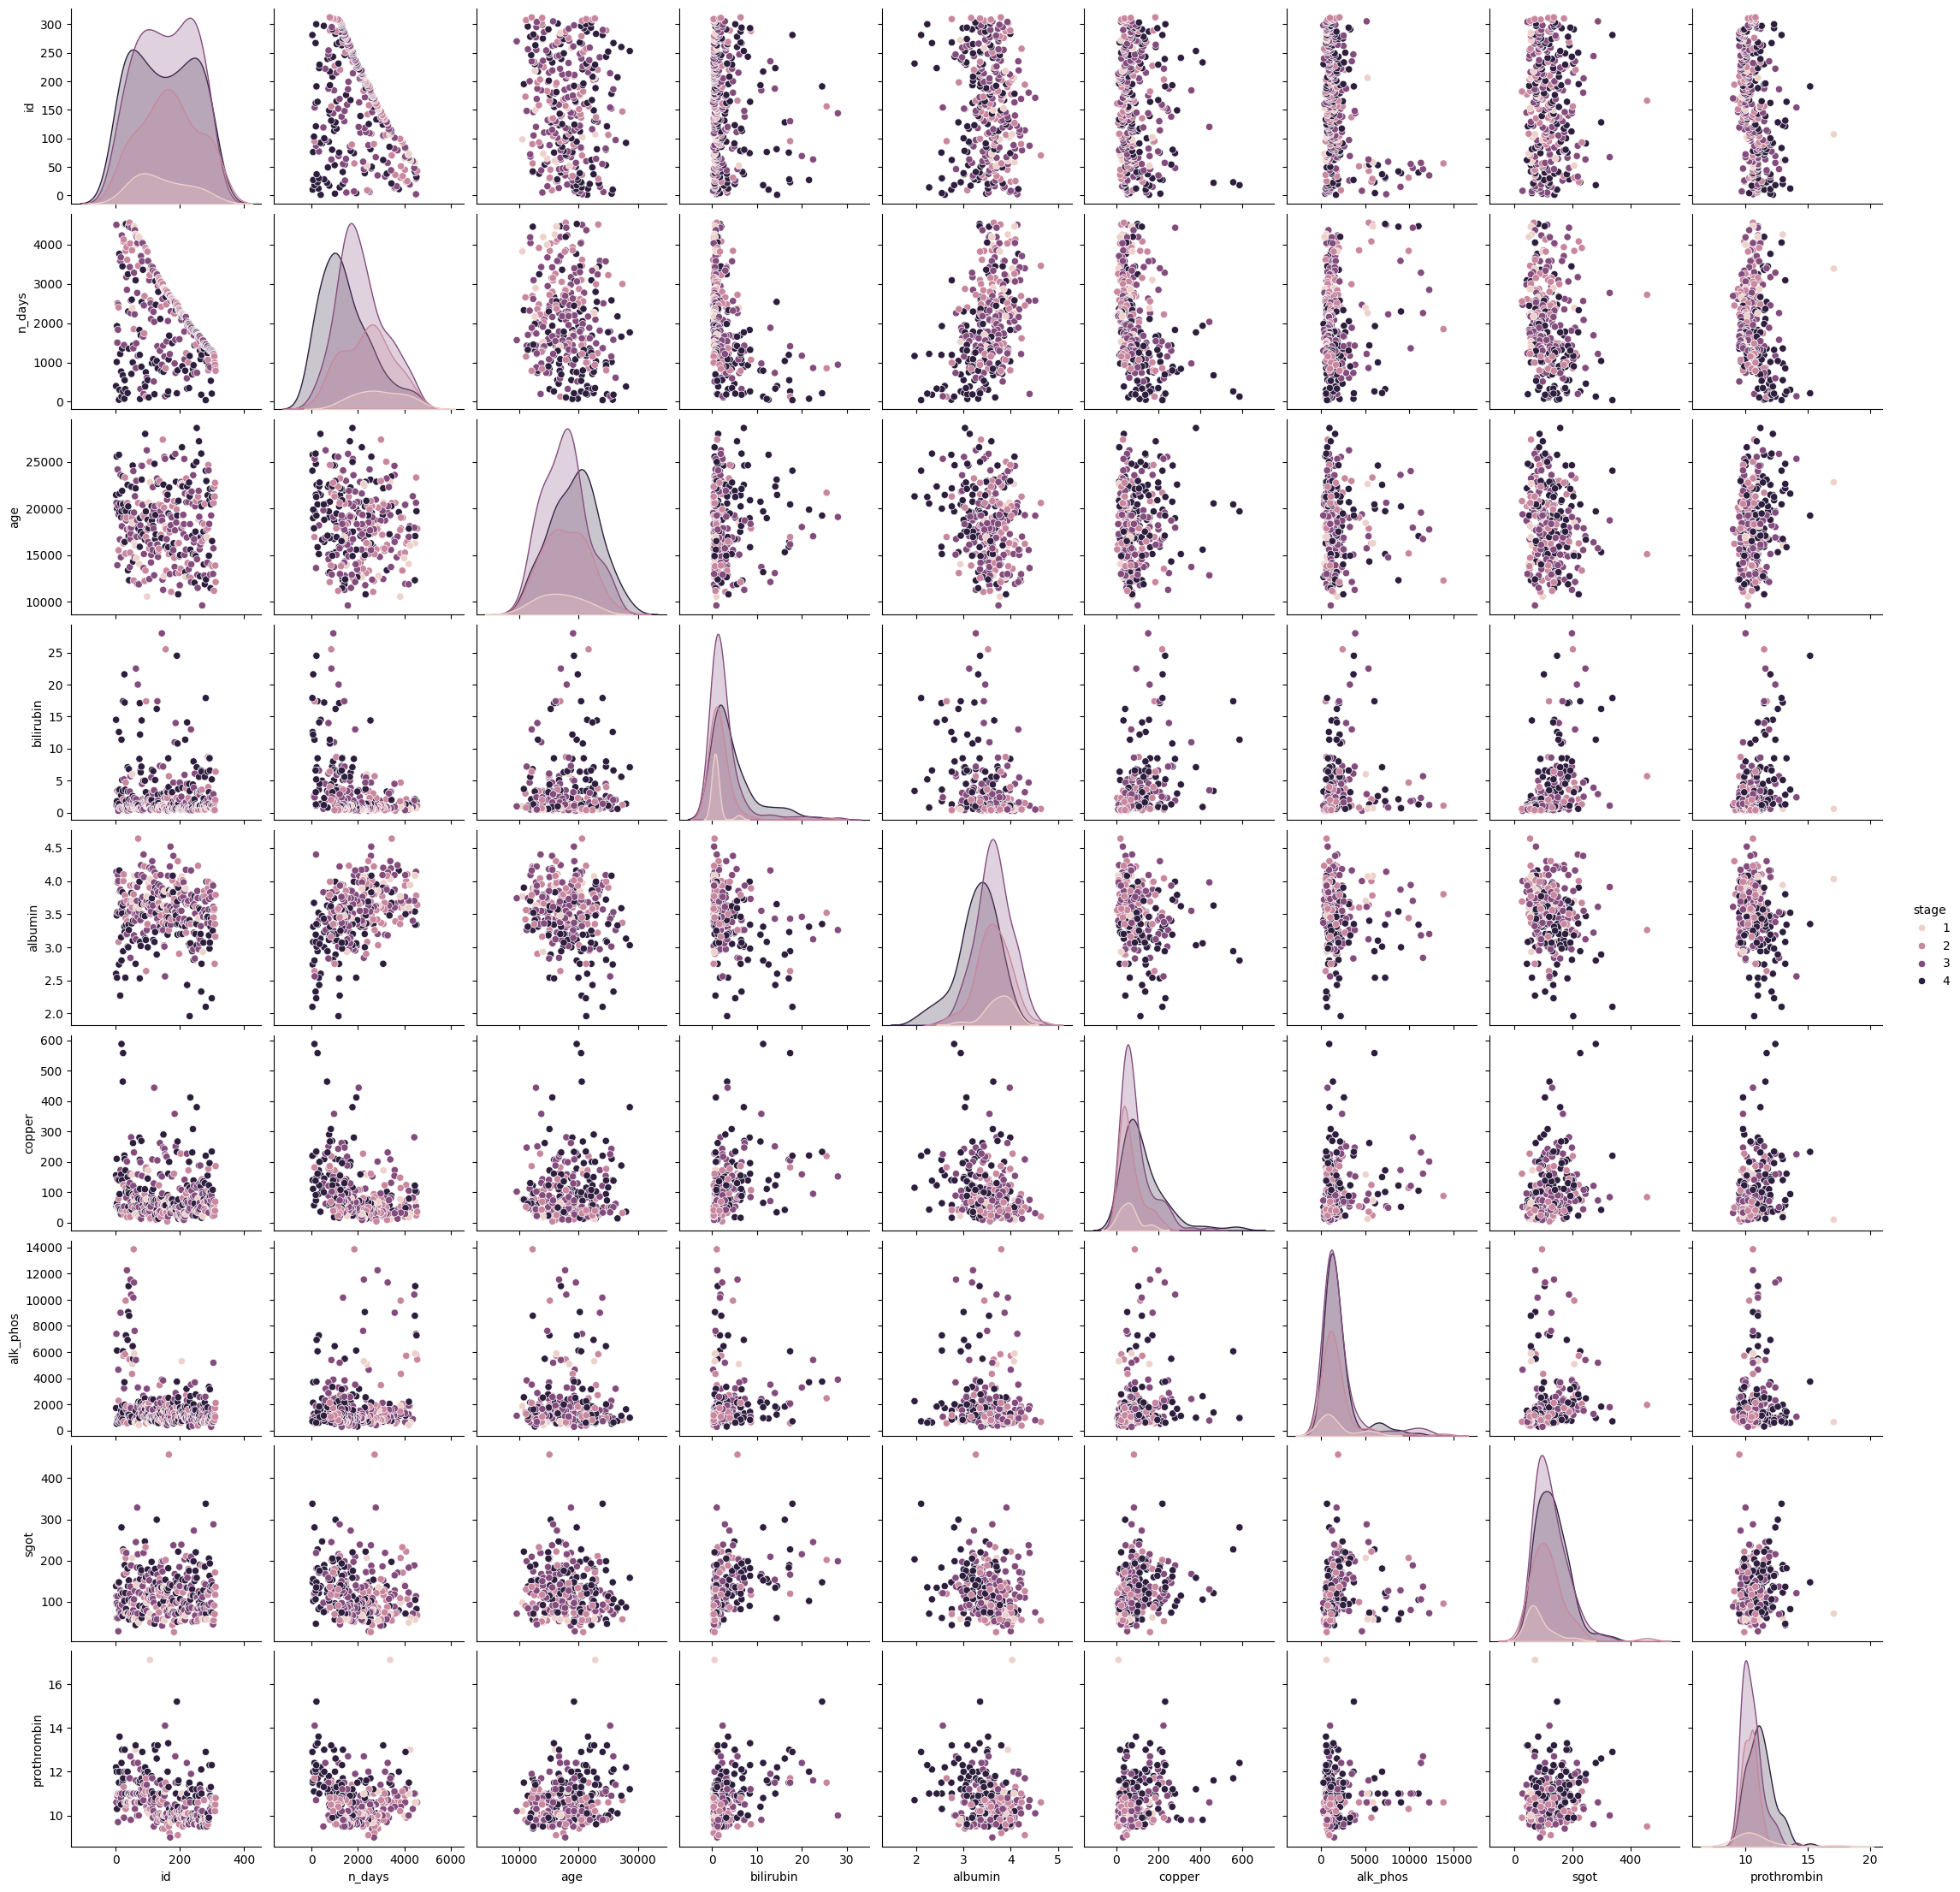

In [2]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-1b2425e4-uts-basdat.f.aivencloud.com",
        user="avnadmin",
        password="AVNS_yzdc0Z-yLsSju9Kx3Tt",
        database="defaultdb",
        port=20998
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM uts.cirrhosis")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari postgre
df_postgre = get_pg_data()

# Cetak data tanpa indeks
print(df_postgre.to_string(index=False))

# Visualisasi scatter plot antar variabel
sns.pairplot(df_postgre, hue="stage")
plt.show()


 id  n_days status            drug   age sex ascites hepatomegaly spiders edema  bilirubin cholesterol  albumin  copper  alk_phos   sgot tryglicerides platelets  prothrombin  stage
  1     400      D D-penicillamine 21464   F       Y            Y       Y     Y       14.5         261     2.60     156      1718 137.95           172       190         12.2      4
  2    4500      C D-penicillamine 20617   F       N            Y       Y     N        1.1         302     4.14      54      7394 113.52            88       221         10.6      3
  3    1012      D D-penicillamine 25594   M       N            N       N     S        1.4         176     3.48     210       516  96.10            55       151         12.0      4
  4    1925      D D-penicillamine 19994   F       N            Y       Y     S        1.8         244     2.54      64      6121  60.63            92       183         10.3      4
  5    1504     CL         Placebo 13918   F       N            Y       Y     N        3.4     

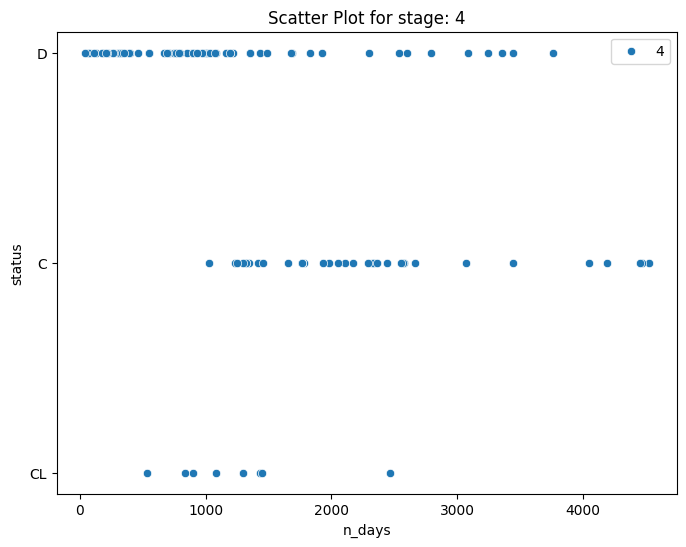

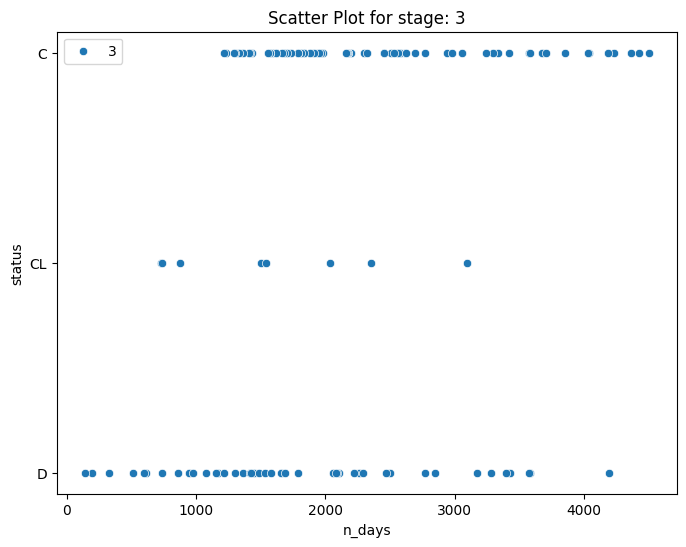

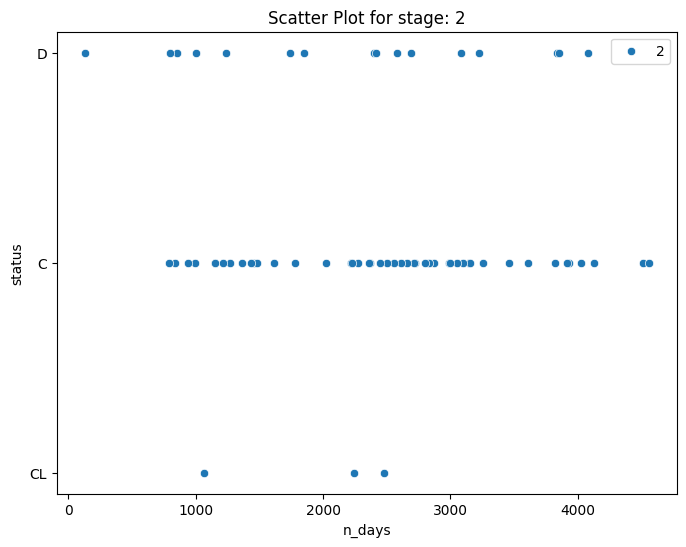

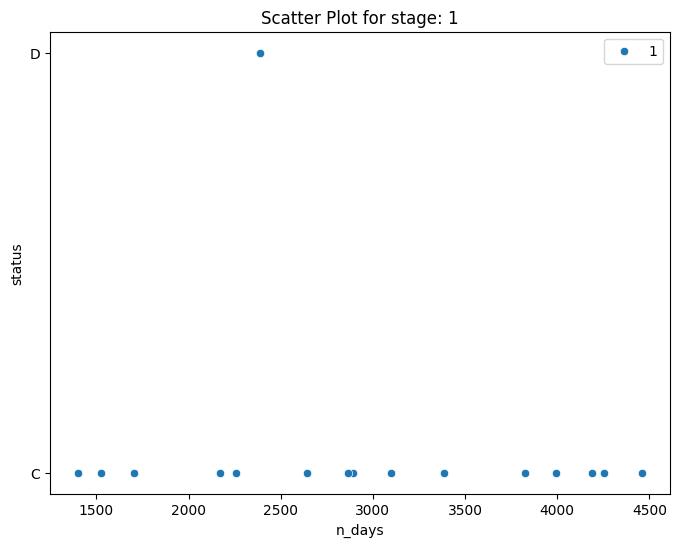

In [3]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-1b2425e4-uts-basdat.f.aivencloud.com",
        user="avnadmin",
        password="AVNS_yzdc0Z-yLsSju9Kx3Tt",
        database="defaultdb",
        port=20998
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM uts.cirrhosis")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari PostgreSQL
df_postgresql = get_pg_data()

# Cetak data tanpa indeks
print(df_postgresql.to_string(index=False))

for stage_name in df_postgresql['stage'].unique():
    df_stage = df_postgresql[df_postgresql['stage'] == stage_name]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_stage.iloc[:, 1], y=df_stage.iloc[:, 2], label=stage_name)
    plt.xlabel(df_stage.columns[1])
    plt.ylabel(df_stage.columns[2])
    plt.title(f"Scatter Plot for stage: {stage_name}")
    plt.legend()
    plt.show()


 id  n_days status            drug   age sex ascites hepatomegaly spiders edema  bilirubin cholesterol  albumin  copper  alk_phos   sgot tryglicerides platelets  prothrombin  stage
  1     400      D D-penicillamine 21464   F       Y            Y       Y     Y       14.5         261     2.60     156      1718 137.95           172       190         12.2      4
  2    4500      C D-penicillamine 20617   F       N            Y       Y     N        1.1         302     4.14      54      7394 113.52            88       221         10.6      3
  3    1012      D D-penicillamine 25594   M       N            N       N     S        1.4         176     3.48     210       516  96.10            55       151         12.0      4
  4    1925      D D-penicillamine 19994   F       N            Y       Y     S        1.8         244     2.54      64      6121  60.63            92       183         10.3      4
  5    1504     CL         Placebo 13918   F       N            Y       Y     N        3.4     

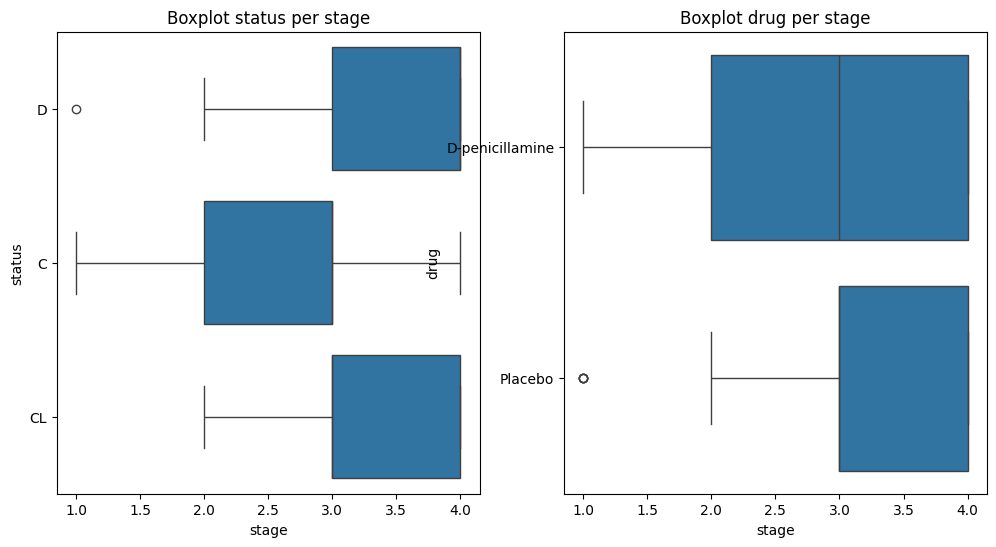

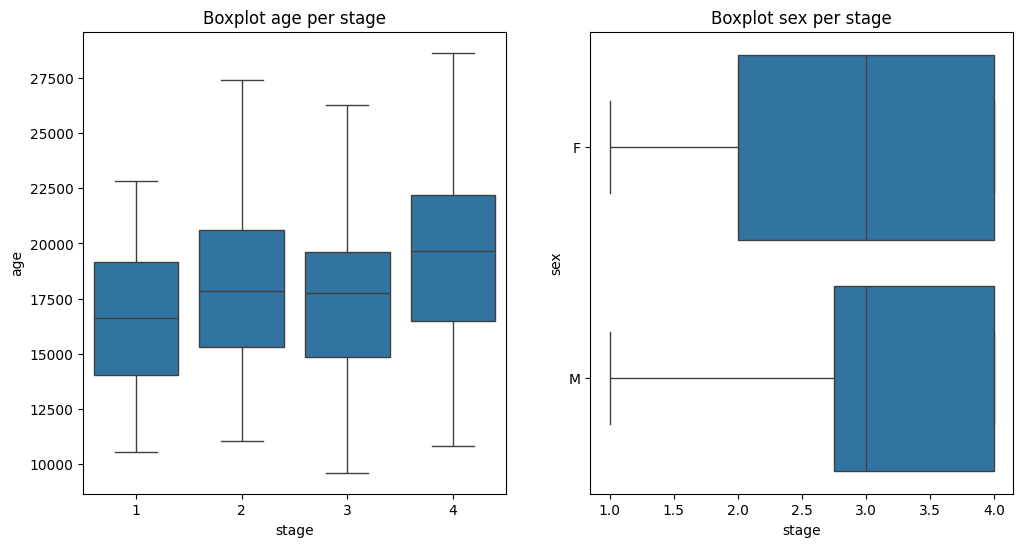

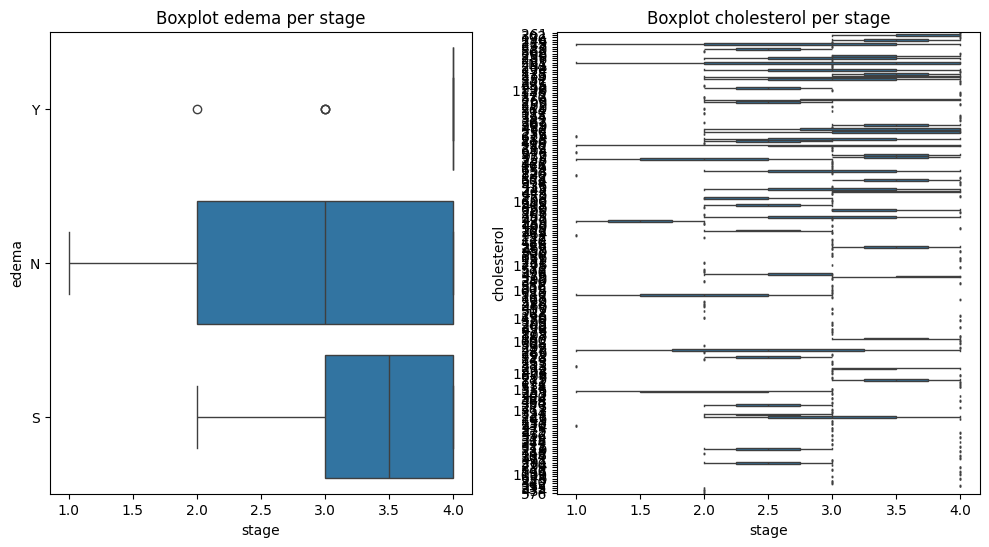

In [4]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-1b2425e4-uts-basdat.f.aivencloud.com",
        user="avnadmin",
        password="AVNS_yzdc0Z-yLsSju9Kx3Tt",
        database="defaultdb",
        port=20998
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM uts.cirrhosis")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari postgre
df_postgre = get_pg_data()

# Cetak data tanpa indeks
print(df_postgre.to_string(index=False))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="stage", y=df_postgre.iloc[:, 2], data=df_postgre)
plt.title("Boxplot status per stage")

plt.subplot(1, 2, 2)
sns.boxplot(x="stage", y=df_postgre.iloc[:, 3], data=df_postgre)
plt.title("Boxplot drug per stage")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="stage", y=df_postgre.iloc[:, 4], data=df_postgre)
plt.title("Boxplot age per stage")

plt.subplot(1, 2, 2)
sns.boxplot(x="stage", y=df_postgre.iloc[:, 5], data=df_postgre)
plt.title("Boxplot sex per stage")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="stage", y=df_postgre.iloc[:, 9], data=df_postgre)
plt.title("Boxplot edema per stage")

plt.subplot(1, 2, 2)
sns.boxplot(x="stage", y=df_postgre.iloc[:, 11], data=df_postgre)
plt.title("Boxplot cholesterol per stage")

plt.show()